In [4]:
import numpy as np

In [5]:
age = np.array([25, 30, 35, 40, 45])
height = np.array([175, 180, 185, 165, 170])
weight = np.array([70, 80, 75, 65, 72])

age_std = (age - np.mean(age)) / np.std(age)
height_std = (height - np.mean(height)) / np.std(height)
weight_std = (weight - np.mean(weight)) / np.std(weight)

In [7]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
    
    def fit(self, X):
        X = X.copy()
        self.mean = np.mean(X)
        self.std = np.std(X)
        self.X_std = (X - self.mean) / self.std

        covariance_matrix = np.cov(self.X_std.T)   # (X.T @ X)/ (X.shape[0]-1)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

        sorted_indices = np.argsort(eigen_values)[::-1]
        self.sorted_eigen_values = eigen_values[sorted_indices]
        self.sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

        self.top_eigen_vectors = self.sorted_eigen_vectors[:, :self.n_components]
        self.X_pca = self.X_std.dot(self.top_eigen_vectors)

        return self   

    def transform(self,X):
        X_std = self.X_std
        X_proj = X_std.dot(self.top_eigen_vectors)
        return X_proj     

In [8]:
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])
pca = PCA(n_components = 1).fit(X)
new_data = np.array([[3.0, 2.8], [1.0, 1.2]])
X_new_proj = pca.transform(pca.X_std)
print("Components:",pca.top_eigen_vectors)
print(X_new_proj)

Components: [[0.72474155]
 [0.68902082]]
[[ 0.51631703]
 [-2.55871063]
 [ 0.66543035]
 [-0.15557681]
 [ 1.51158436]]


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_std)
X_new_proj = pca.transform(X_std)
print("Components:",pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)
print(X_new_proj)
X_pca = pca.transform(X_std)

Components: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Explained variance ratio:
 [0.96982031 0.03017969]
[[ 0.5124457   0.23853092]
 [-2.57528445  0.06114533]
 [ 0.69555387 -0.43434461]
 [-0.1485184  -0.0800397 ]
 [ 1.51580328  0.21470806]]


Transformed new data: [[ 0.5124457   0.23853092]
 [-2.57528445  0.06114533]
 [ 0.69555387 -0.43434461]
 [-0.1485184  -0.0800397 ]
 [ 1.51580328  0.21470806]]


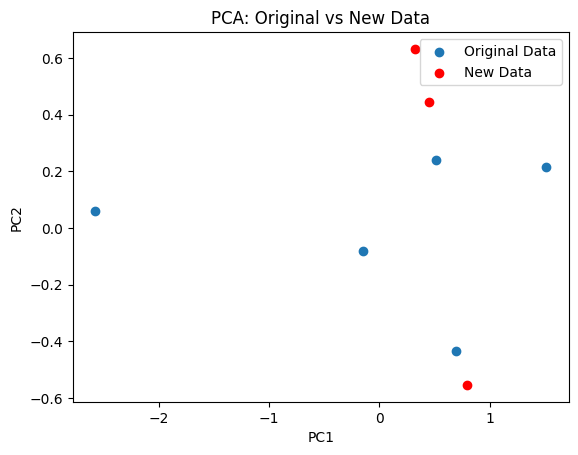

In [ ]:
print('Transformed new data:', X_new_proj)

plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Original Data')
plt.scatter(pca.components_[:, 0], pca.components_[:, 1], label='New Data', color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Original vs New Data')
plt.legend()
plt.show()

In [11]:
#Covariance Matrix

X_std = np.column_stack((age_std, height_std, weight_std))
print("X_std:", X_std)

X_std: [[-1.41421356  0.         -0.47961646]
 [-0.70710678  0.70710678  1.51878546]
 [ 0.          1.41421356  0.5195845 ]
 [ 0.70710678 -1.41421356 -1.47881742]
 [ 1.41421356 -0.70710678 -0.07993608]]


In [12]:
covariance_matrix = np.cov(X_std.T)
print("Covariance Matrix:", covariance_matrix)

Covariance Matrix: [[ 1.25       -0.625      -0.38859798]
 [-0.625       1.25        0.98915848]
 [-0.38859798  0.98915848  1.25      ]]


In [13]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Values:", eigen_values)
print("Eigen Vectors:", eigen_vectors)

Eigen Values: [2.61795752 0.90746972 0.22457276]
Eigen Vectors: [[ 0.46701267 -0.85860045 -0.21143426]
 [-0.64823991 -0.16980773 -0.7422603 ]
 [-0.60140185 -0.48370509  0.63588144]]


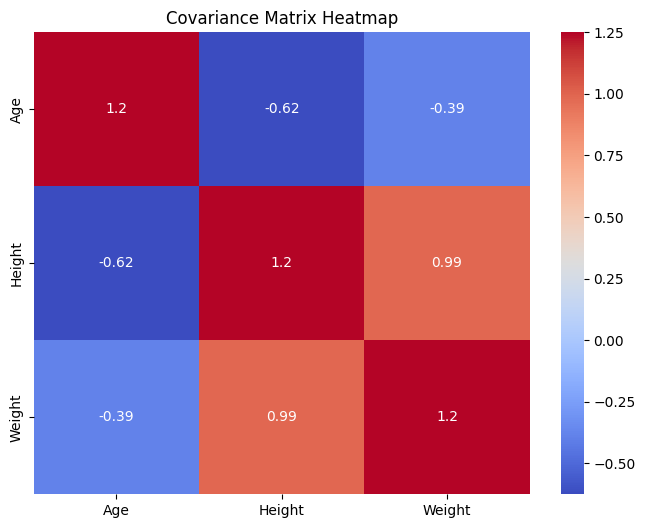

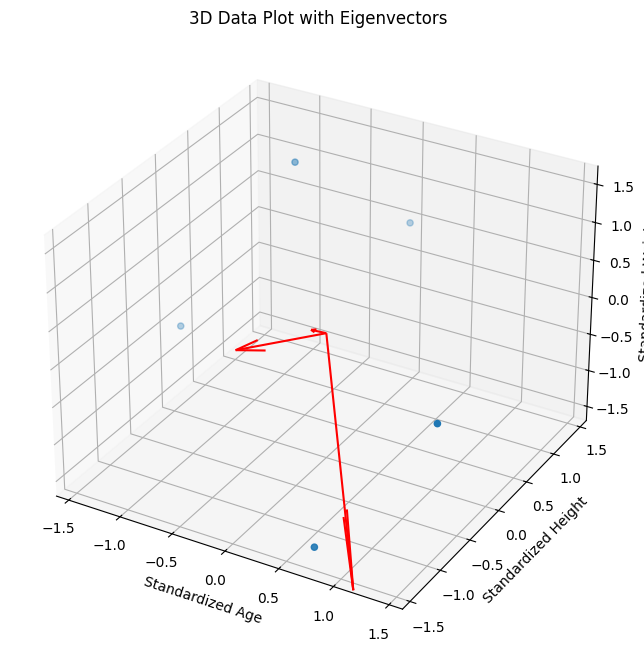

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', xticklabels=['Age', 'Height', 'Weight'], yticklabels=['Age', 'Height', 'Weight'])
plt.title('Covariance Matrix Heatmap')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age_std, height_std, weight_std)

for i in range(len(eigen_values)):
    vec = eigen_vectors[:,i] * eigen_values[i]
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r')

ax.set_xlabel('Standardized Age')
ax.set_ylabel('Standardized Height')
ax.set_zlabel('Standardized Weight')
plt.title('3D Data Plot with Eigenvectors')
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform((np.column_stack((age, height, weight))).T)

In [17]:
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

In [18]:
pca.explained_variance_

array([7.47838545e+00, 2.16145473e-02, 9.96046831e-32])

Transformed new data: [[ 1.41421356e+00  4.10455700e-16]
 [-1.41421356e+00 -3.36335099e-17]]


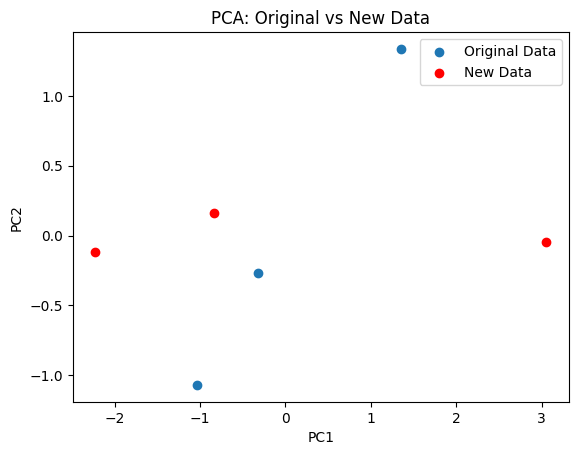

In [20]:
print('Transformed new data:', X_new_pca)

# Visualize the transformed original data and new data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label='Original Data')
plt.scatter(principal_components[:, 0], principal_components[:, 1], label='New Data', color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Original vs New Data')
plt.legend()
plt.show()